# Load Packages

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, StratifiedKFold

In [2]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

# Read Data

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


In [4]:
data.drop(['ID_code'], axis=1, inplace=True)  # dropping ID_code column from dataset

# Exploratory Data Analysis

In [6]:
data.describe() # generating descriptive statistics

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


Observations:

The dataset's standard deviation is quite significant.
The values of min, max, mean, and sdt for dataset appear to be pretty similar.
The mean values are spread out over a wide range.

In [7]:
data.isnull().values.sum() # checking for null vlaues in the dataset

0

In [8]:
for cl in data.columns[1:]:
    print("Total number of unique values in {} : {}".format(cl, data[cl].nunique()))

Total number of unique values in var_0 : 94672
Total number of unique values in var_1 : 108932
Total number of unique values in var_2 : 86555
Total number of unique values in var_3 : 74597
Total number of unique values in var_4 : 63515
Total number of unique values in var_5 : 141029
Total number of unique values in var_6 : 38599
Total number of unique values in var_7 : 103063
Total number of unique values in var_8 : 98617
Total number of unique values in var_9 : 49417
Total number of unique values in var_10 : 128764
Total number of unique values in var_11 : 130193
Total number of unique values in var_12 : 9561
Total number of unique values in var_13 : 115181
Total number of unique values in var_14 : 79122
Total number of unique values in var_15 : 19810
Total number of unique values in var_16 : 86918
Total number of unique values in var_17 : 137823
Total number of unique values in var_18 : 139515
Total number of unique values in var_19 : 144180
Total number of unique values in var_20 : 

Total number of unique values in var_170 : 113720
Total number of unique values in var_171 : 125914
Total number of unique values in var_172 : 143366
Total number of unique values in var_173 : 128120
Total number of unique values in var_174 : 134945
Total number of unique values in var_175 : 92659
Total number of unique values in var_176 : 142521
Total number of unique values in var_177 : 85720
Total number of unique values in var_178 : 145235
Total number of unique values in var_179 : 90090
Total number of unique values in var_180 : 123477
Total number of unique values in var_181 : 56164
Total number of unique values in var_182 : 149195
Total number of unique values in var_183 : 117529
Total number of unique values in var_184 : 145184
Total number of unique values in var_185 : 120747
Total number of unique values in var_186 : 98060
Total number of unique values in var_187 : 157031
Total number of unique values in var_188 : 108813
Total number of unique values in var_189 : 41764
Total 

Except for var_68, most features contain thousands of possible values.
var_68 contains 451 different vaariables

In [9]:
correlation = data.corr() 

In [10]:
abs(correlation['target']).sort_values(ascending=False) # checking correlation between features and target variable

target     1.000000
var_81     0.080917
var_139    0.074080
var_12     0.069489
var_6      0.066731
             ...   
var_38     0.000970
var_17     0.000864
var_30     0.000638
var_27     0.000582
var_185    0.000053
Name: target, Length: 201, dtype: float64

The largest correlation value is shown by var_81 feature i.e. 0.080917 

# Prepare the Data

In [5]:
features = data.drop(['target'], axis = 1)    #separating target variable from features
target = data['target']

sc = StandardScaler()                        
train_features = sc.fit_transform(features)   #performing standardizing of features

X_train, X_test, Y_train, Y_test = train_test_split(train_features, target, 
                                                    test_size= 0.3, random_state = 20)
# splitting dataset into train and test set in ratio 70:30

C:\Users\obero\Anaconda3\envs\ce802\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target', ylabel='count'>

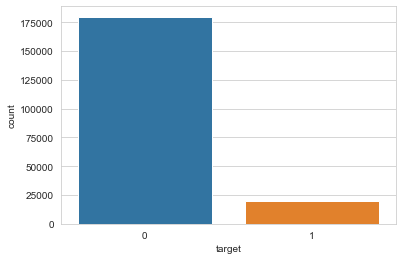

In [12]:
sns.set_style('whitegrid')     
sns.countplot(target)                #checking distribution of target column.

The dataset is unbalanced with respect to target column

# Feature Engineering

In [6]:
from sklearn.decomposition import PCA      #importing pca from sklearn library

In [7]:
pca = PCA(0.90)                      # specifying PCA(0.90) means that 90% of the variance would be covered
Px = pca.fit_transform(X_train)      # by the principal components
Pxtest = pca.transform(X_test)

In [8]:
pca.n_components_   

179

179 principal components are needed to explain 90% of variance in the dataset

# Models

In [16]:
# defining function performance to print confusion matrix and auc of models.

def performance(Y_test, pred):
    pred_var = [0 if i < 0.5 else 1 for i in pred]
    print('Confusion Matrix:')
    print(confusion_matrix(Y_test, pred_var)) 
    fpr, tpr, thresholds = roc_curve(Y_test, pred, pos_label=1)
    print('AUC:')
    print(auc(fpr, tpr))

# Decision Tree Classifier

In [17]:
# Defining Parameters For Model
tree = DecisionTreeClassifier(class_weight='balanced', random_state = 20, 
                                  max_features = 0.7, min_samples_leaf = 80)
tree.fit(Px, Y_train)     # training the model with train dataset

DecisionTreeClassifier(class_weight='balanced', max_features=0.7,
                       min_samples_leaf=80, random_state=20)

In [19]:
tree_preds = tree.predict_proba(Pxtest)[:, 1]   #predicting test dataset to evaluate the model
performance(Y_test, tree_preds)                #passing parameters to performance function

Confusion Matrix:
[[40939 13039]
 [ 1698  4324]]
AUC:
0.8068976546763169


In [20]:
imp = tree.feature_importances_         #get importances of the variables
for i,v in enumerate(imp):              
    print('var_ %0d, Score: %.5f' % (i,v))

var_ 0, Score: 0.72652
var_ 1, Score: 0.00321
var_ 2, Score: 0.00097
var_ 3, Score: 0.00029
var_ 4, Score: 0.00224
var_ 5, Score: 0.00156
var_ 6, Score: 0.00116
var_ 7, Score: 0.00154
var_ 8, Score: 0.00062
var_ 9, Score: 0.00063
var_ 10, Score: 0.00146
var_ 11, Score: 0.00181
var_ 12, Score: 0.00100
var_ 13, Score: 0.00075
var_ 14, Score: 0.00143
var_ 15, Score: 0.00148
var_ 16, Score: 0.00252
var_ 17, Score: 0.00072
var_ 18, Score: 0.00146
var_ 19, Score: 0.00061
var_ 20, Score: 0.00093
var_ 21, Score: 0.00189
var_ 22, Score: 0.00202
var_ 23, Score: 0.00129
var_ 24, Score: 0.00178
var_ 25, Score: 0.00108
var_ 26, Score: 0.00297
var_ 27, Score: 0.00019
var_ 28, Score: 0.00270
var_ 29, Score: 0.00149
var_ 30, Score: 0.00123
var_ 31, Score: 0.00135
var_ 32, Score: 0.00095
var_ 33, Score: 0.00338
var_ 34, Score: 0.00396
var_ 35, Score: 0.00218
var_ 36, Score: 0.00092
var_ 37, Score: 0.00319
var_ 38, Score: 0.00246
var_ 39, Score: 0.00121
var_ 40, Score: 0.00192
var_ 41, Score: 0.00268
va

# Logistic Regression

In [21]:
# Defining model of Logistic Regression with parameters C and class_weight
logist = LogisticRegression(C=0.001, class_weight='balanced')

# Fitting the training data on the defined model
logist.fit(Px, Y_train)
logist_pred = logist.predict_proba(Pxtest)[:,1]

In [22]:
performance(Y_test, logist_pred)    #passing parameters to performance function

Confusion Matrix:
[[42321 11657]
 [ 1354  4668]]
AUC:
0.8583952656259494


# SVM

In [23]:
from sklearn import svm
# Defining model of SVM with parameters C and gamma
Svm = svm.SVC(C =  1, gamma =  0.1,probability=True,verbose=True)

In [ ]:
Svm.fit(Px,Y_train)   # Fitting the training data on the defined model

[LibSVM]

In [ ]:
Svm_preds = Svm.predict_proba(X_test)[:, 1]
performance(Y_test, Svm_preds)           #passing parameters to performance function

# MLP

In [6]:
import keras
from keras.models import Sequential     #importing sequential from keras library
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [10]:
model = Sequential()       #defining sequential model

In [11]:
# adding mlp layers
model.add(Dense(60,kernel_initializer='normal', activation='relu', input_dim=179))
model.add(Dense(1, kernel_initializer='normal', activation= 'relu'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
model.layers 

In [13]:
model.summary()  #summary of MLP model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 60)                10800     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 61        
Total params: 10,861
Trainable params: 10,861
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(Px, Y_train, epochs=10, validation_data=(Pxtest, Y_test)) #fitting data on train set and validating on test set.

Train on 140000 samples, validate on 60000 samples
Epoch 1/10
140000/140000 [==============================] - 9s 62us/step - loss: 0.3353 - accuracy: 0.9046 - val_loss: 0.3156 - val_accuracy: 0.9061
Epoch 2/10
140000/140000 [==============================] - 9s 61us/step - loss: 0.3868 - accuracy: 0.8860 - val_loss: 0.3509 - val_accuracy: 0.90820.3868 - accuracy
Epoch 3/10
140000/140000 [==============================] - 9s 61us/step - loss: 0.3489 - accuracy: 0.9018 - val_loss: 0.3591 - val_accuracy: 0.8866- ETA: 4s - l - ETA: 3s - loss: 0.3475 - 
Epoch 4/10
140000/140000 [==============================] - 9s 61us/step - loss: 0.3272 - accuracy: 0.9050 - val_loss: 0.3040 - val_accuracy: 0.9103: 0.3300 - ac - ETA: 0s - loss: 0.3289 - accuracy - ETA: 0s - loss: 0.3283 - accuracy
Epoch 5/10
140000/140000 [==============================] - 9s 62us/step - loss: 0.3827 - accuracy: 0.9006 - val_loss: 0.4186 - val_accuracy: 0.8986
Epoch 6/10
140000/140000 [==============================] - 9

In [15]:
score = model.evaluate(Pxtest, Y_test, verbose=0) 
print('Test loss:', score[0])
print('Test accuracy:', score[1])  # printing test accuracy and test loss

Test loss: 0.39939817755222323
Test accuracy: 0.8750666379928589


# CNN

In [7]:
from pyDeepInsight import ImageTransformer, LogScaler  # importing image transformer from Deepinsight python package 
from matplotlib import pyplot as plt

In [8]:
X1_train, X2_test, Y1_train, Y2_test = train_test_split(features, target, 
                                                    test_size= 0.3, random_state = 21)
# splitting dataset into train and test set in ratio 70:30

In [9]:
ln = LogScaler()                       #defining logscaler
X_train_norm = ln.fit_transform(X1_train)   #normalizing dataset between 0 and 1
X_test_norm = ln.fit_transform(X2_test)

In [10]:
it = ImageTransformer(feature_extractor='tsne',            #initializing image transformer
                      pixels=50, random_state=22, 
                      n_jobs=-1)

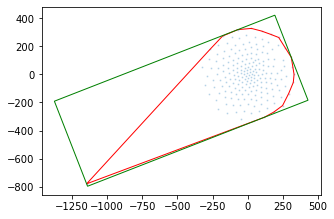

In [20]:
plt.figure(figsize=(5, 5))
it.fit(X_train_norm, plot=True)

On the basis of the training data, train the image transformer. When parameter plot=True is used, a plot is generated that displays the reduced features represented by blue points, all features(red), and rectangle in green represents minimum bounding before rotation.

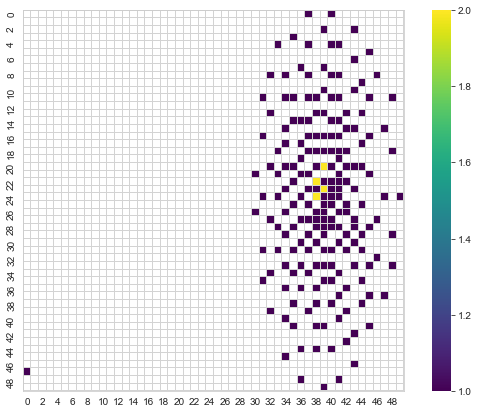

In [36]:
fdm = it.feature_density_matrix()
fdm[fdm == 0] = np.nan

plt.figure(figsize=(10, 7))

ax = sns.heatmap(fdm, cmap="viridis", linewidths=0.01, 
                 linecolor="lightgrey", square=True)
for _, spine in ax.spines.items():
    spine.set_visible(True)

To see total feature overlap, the trained transformer's feature density matrix can be used.

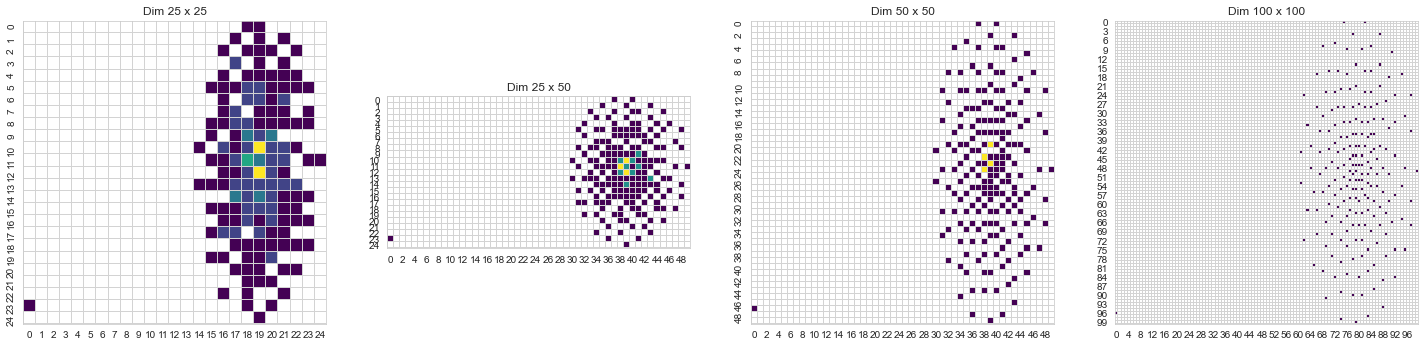

In [37]:
px_sizes = [25, (25, 50), 50, 100]

fig, ax = plt.subplots(1, len(px_sizes), figsize=(25, 7))
for ix, px in enumerate(px_sizes):
    it.pixels = px
    fdm = it.feature_density_matrix()
    fdm[fdm == 0] = np.nan
    cax = sns.heatmap(fdm, cmap="viridis", linewidth=0.01, 
                      linecolor="lightgrey", square=True, 
                      ax=ax[ix], cbar=False)
    cax.set_title('Dim {} x {}'.format(*it.pixels))
    for _, spine in cax.spines.items():
        spine.set_visible(True)

it.pixels = 50

it's easy to update pixel size of the images

In [11]:
mat_train = it.fit_transform(X_train_norm) #the trained image transformer is then used transform data to image(tensors)

In [12]:
mat_test = it.fit_transform(X_test_norm) #the trained image transformer is then used transform test data to image(tensors)

In [13]:
from keras.layers import Flatten          #importing CNN layers from keras library
from keras.layers import Conv2D, MaxPooling2D

In [14]:
#Defining parameters of CNN
batch_size = 128
num_classes = 2
epochs = 10

# input image dimensions
img_rows, img_cols = 50, 50

from keras.utils.np_utils import to_categorical

Y_train = to_categorical(Y_train, num_classes)
Y_test =  to_categorical(Y_test, num_classes)

In [15]:
model = Sequential()                #defining sequential model
model.add(Conv2D(8, kernel_size=(3, 3),          # stacking layers in CNN architecture
                 activation='relu',
                 input_shape=(50,50,3)))
model.add(Conv2D(4, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))        # adding maxpooling layer
model.add(Dropout(0.25))                         
model.add(Flatten())
model.add(Dense(1, activation='relu'))          # adding fully connected layer
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [16]:
model.summary()   #summary of CNN model architecture

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 8)         224       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 4)         292       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 4)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 4)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2116)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2117      
_________________________________________________________________
dropout_2 (Dropout)          (None, 1)                

In [17]:
# defining loss,optimizer and metrics to be used for evaluating the model.
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),       
              metrics=['accuracy'])

# fitting the defined CNN model on train data and validating on test data
model.fit(mat_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(mat_test, Y_test))
score = model.evaluate(mat_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])      #printing test loss and accuracy

Train on 140000 samples, validate on 60000 samples
Epoch 1/10
140000/140000 [==============================] - 192s 1ms/step - loss: 0.4097 - accuracy: 0.8994 - val_loss: 0.3265 - val_accuracy: 0.8996
Epoch 2/10
140000/140000 [==============================] - 196s 1ms/step - loss: 0.3263 - accuracy: 0.8995 - val_loss: 0.3259 - val_accuracy: 0.8996
Epoch 3/10
140000/140000 [==============================] - 199s 1ms/step - loss: 0.3263 - accuracy: 0.8995 - val_loss: 0.3259 - val_accuracy: 0.8996
Epoch 4/10
140000/140000 [==============================] - 207s 1ms/step - loss: 0.3263 - accuracy: 0.8995 - val_loss: 0.3259 - val_accuracy: 0.8996
Epoch 5/10
140000/140000 [==============================] - 200s 1ms/step - loss: 0.3263 - accuracy: 0.8995 - val_loss: 0.3259 - val_accuracy: 0.8996
Epoch 6/10
140000/140000 [==============================] - 195s 1ms/step - loss: 0.3263 - accuracy: 0.8995 - val_loss: 0.3259 - val_accuracy: 0.8996
Epoch 7/10
140000/140000 [=======================